In [1]:
Pkg.activate("..");using ShallowWaterModels #include("../src/dependencies.jl");
include("../src/initialdata/HighFreq.jl");
include("../src/initialdata/BellCurve.jl");
include("../src/models/Matsuno_mod_naive.jl");
include("../src/models/Matsuno_naive.jl");
include("../src/models/Matsuno.jl");
include("../src/Figures.jl");
pyplot()

Plots.PyPlotBackend()

In [2]:
param = ( ϵ  = 1/2,
            N  = 2^14,
            L  = 10,
            T  = 5,
            dt = 0.001)

(ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)

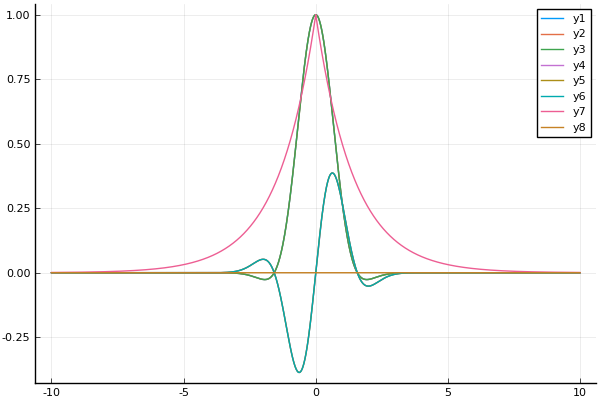

In [3]:
init1 = HighFreq(merge(param,(s=2,freq=[0,10])))
init2 = HighFreq(merge(param,(s=2,freq=[0,50])))
init3 = HighFreq(merge(param,(s=2,freq=[0,100])))
init4 = BellCurve(merge(param,(θ=1,p=2)))
x=Mesh(param).x
plot(x,[init1.η(x) init2.η(x) init3.η(x) init1.v(x) init2.v(x) init3.v(x) init4.η(x) init4.v(x)])

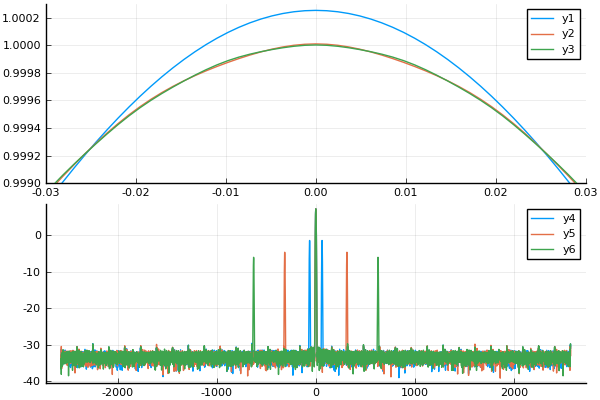

In [4]:
using FFTW
p = plot(layout=(2,1))
k=Mesh(param).k

plot!(p[1,1],x,[init1.η(x) init2.η(x) init3.η(x)],xlims=(-.03,.03),ylims=(0.9990,1.0003))
plot!(p[2,1],k,[log.(abs.(fft(init1.η(x)))) log.(abs.(fft(init2.η(x)))) log.(abs.(fft(init3.η(x))))])


In [5]:
inits = [init1,init2,init3]

models = []

push!(models,Matsuno_mod_naive(param));
push!(models,Matsuno_naive(param));
push!(models,Matsuno(param));

problems = []
for init in inits
    for model in models
        push!(problems,Problem(model, init, param));
    end
end

┌ Info: 
│ Builds the initial-value problem for model modified Matsuno
│ with parameters
│ (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:46
┌ Info: 
│ Builds the initial-value problem for model Matsuno naive
│ with parameters
│ (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:46
┌ Info: 
│ Builds the initial-value problem for model Matsuno
│ with parameters
│ (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:46
┌ Info: 
│ Builds the initial-value problem for model modified Matsuno
│ with parameters
│ (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:46
┌ Info: 
│ Build

In [6]:
ni = length(inits)
nm = length(models)


function init(args...)
    indices = []
    for n in args
        append!(indices,range(nm*(n-1)+1, stop = nm*(n-1)+nm))
    end
    indices
end

function model(args...)
    indices = []
    for n in args
        append!(indices,range(n, stop = ni*nm, step = nm))
    end
    indices
end

model (generic function with 1 method)

In [7]:
function compute(p)
    for problem in p
        print("\nNow solving the model ",problem.model.label,"\n")
        @time solve!( problem )
        sleep(0.1)
    end
end

compute (generic function with 1 method)

In [8]:
compute(problems[init(1)])


Now solving the model modified Matsuno


┌ Info: 
│ Now solving the initial-value problem for model modified Matsuno
│ with parameters
│ (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:83
Progress: 100%|█████████████████████████████████████████| Time: 0:03:59



239.945948 seconds (18.67 M allocations: 137.672 GiB, 18.98% gc time)

Now solving the model Matsuno naive


┌ Info: 
│ Now solving the initial-value problem for model Matsuno naive
│ with parameters
│ (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:83
Progress: 100%|█████████████████████████████████████████| Time: 0:03:51



231.631344 seconds (12.81 M allocations: 154.474 GiB, 21.11% gc time)

Now solving the model Matsuno


┌ Info: 
│ Now solving the initial-value problem for model Matsuno
│ with parameters
│ (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)
└ @ ShallowWaterModels /Users/vduchene/Desktop/Julia/WaterWavesModels/ShallowWaterModels.jl/src/problem.jl:83
Progress: 100%|█████████████████████████████████████████| Time: 0:01:13



 73.757389 seconds (2.38 M allocations: 2.551 GiB, 2.07% gc time)


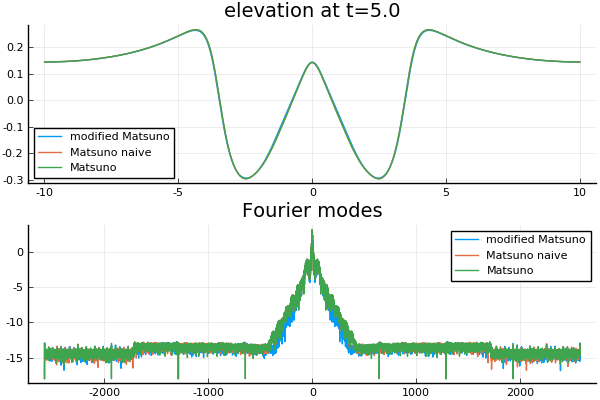

In [18]:
plot_solution(problems[init(1)])

In [10]:
maximum(models[1].mapfro(problems[init(1)[1]].data.U[1000])[2].-models[1].mapfro(problems[init(1)[2]].data.U[1000])[2])

0.006746752837477388

In [11]:
maximum(models[1].mapfro(problems[init(1)[2]].data.U[1000])[2].-models[1].mapfro(problems[init(1)[3]].data.U[1000])[2])

9.028888747764086e-14